#### **📌 Objetivo da Competição**  
O desafio consiste em **prever a quantidade de chuva (rainfall) para cada dia do ano**, utilizando dados meteorológicos disponíveis. Isso envolve a aplicação de **técnicas de pré-processamento, engenharia de features e modelagem preditiva** para construir um modelo eficaz.  

#### **💻 Sobre o Código**  
O código desenvolvido aborda essa competição, implementando um modelo de **Regressão Logística** para prever a variável **rainfall**. Além disso, foram adicionados **explicações detalhadas e aprendizados** adquiridos ao longo do processo, incluindo:  
✔️ Tratamento de dados faltantes  
✔️ Padronização dos dados  
✔️ Seleção de features  
✔️ Ajuste de hiperparâmetros  
✔️ Estratégias de avaliação do modelo  


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [54]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [55]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


### Análise de Componentes faltantes e/ou inconsistentes

In [56]:
train.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [57]:
test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

### Análise Exploratória dos Dados

In [58]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


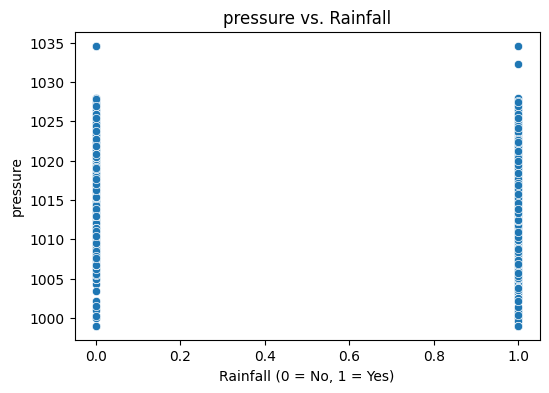

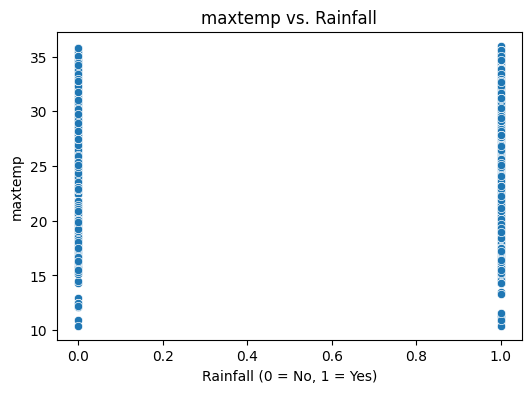

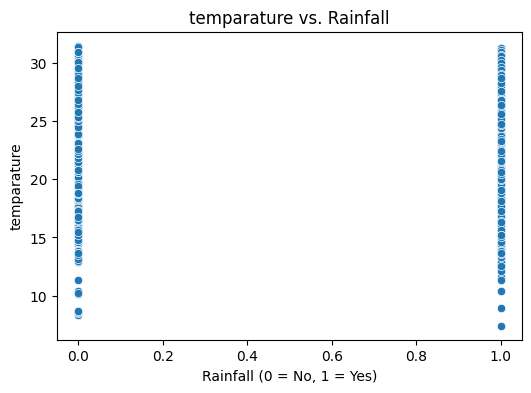

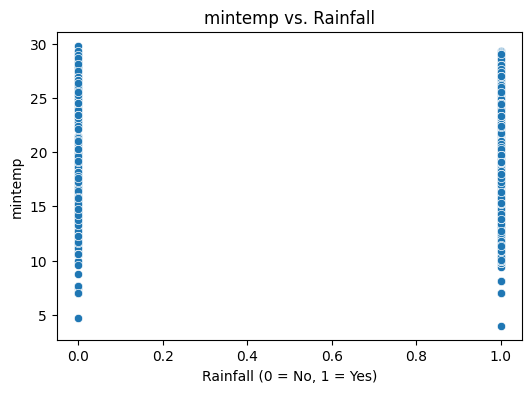

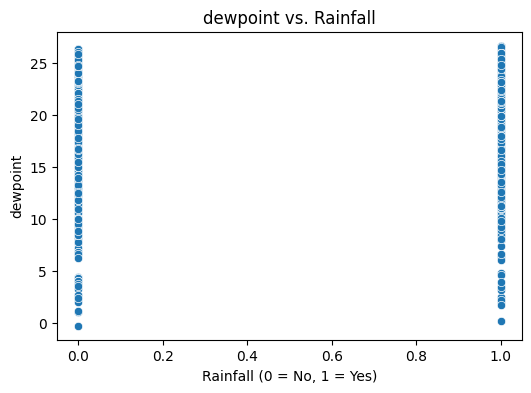

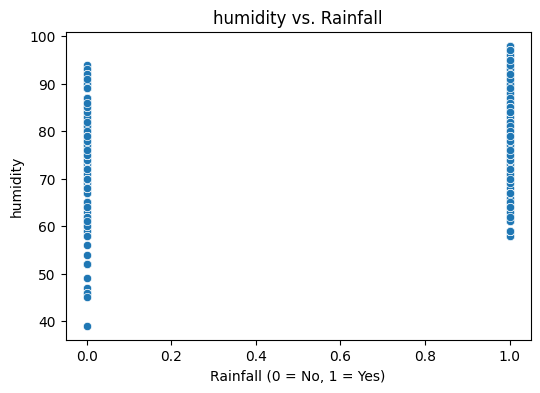

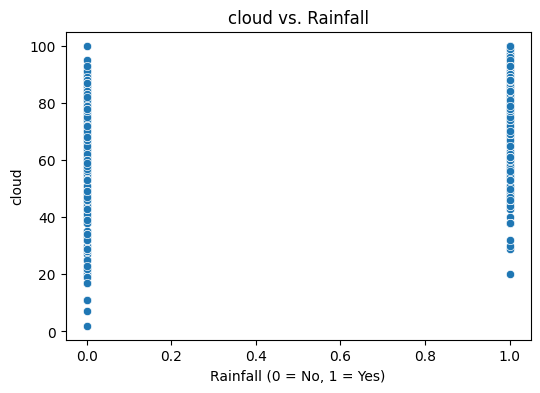

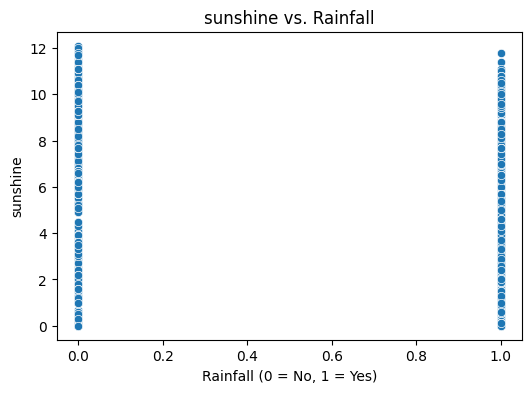

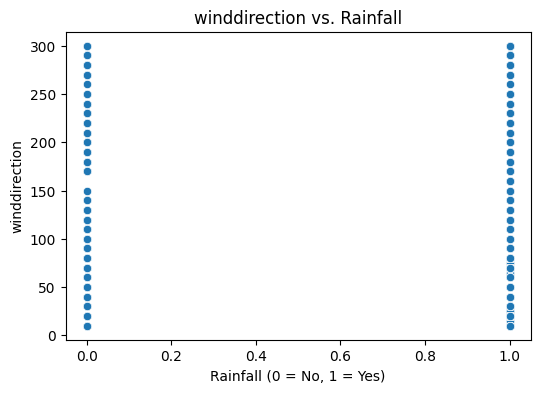

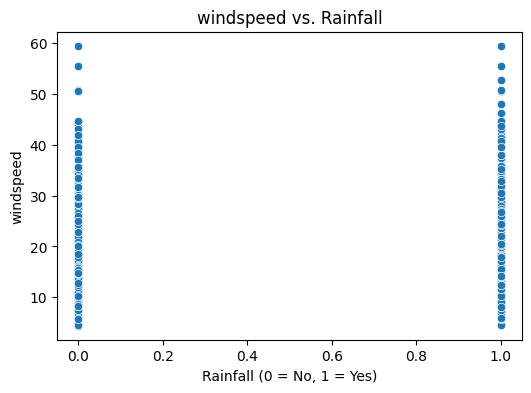

In [59]:
for column in train.columns:
    if column not in ["id", "day", "rainfall"]:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=train["rainfall"], y=train[column])
        plt.title(f"{column} vs. Rainfall")
        plt.xlabel("Rainfall (0 = No, 1 = Yes)")
        plt.ylabel(column)
        plt.show()


In [60]:
# Identificando a quantidade mínima de nuvens em dias de chuva
train.loc[train['rainfall'] == 1, 'cloud'].min()

20.0

In [61]:
# Identificando a úmidade mínima de nuvens em dias de chuva
train.loc[train['rainfall'] == 1, 'humidity'].min()

58.0

#### Informações do ScatterPlot
Pode até parecer que esses scatter plots não nos informou nada, pela sua beleza e só ter duas formas de os dados se "espalharem"

Porém se a gente reparar, eles até que revelaram informações úteis, como:

* Por não haver nenhum ponto distribuído, nem entre os dados **0.0 e 1.0**, e nem além deles, isso nos informa que os dados de chuva (0.0 ou 1.0) estão bem tratados
* Em todos os dias que houve chuva, o valor apresentado em **nuvens** sempre foi no mínimo 20, ou seja, não teve nenhum dia que houve chuva em que o valor de **nuvens** foi menor que 20. (Informação clara devido à experiências do dia a dia, porém comprovamos ela com dados)
* Seguindo o mesmo princípio, e esse é mais óbvio ainda, porém é importante destacarmos, não houve um dia de chuva em que a **úmidade** local tenha sido menor que **58**.

Obs: É importante essa análise em datasets como esse, pois nesses casos não sabemos o local que estamos tratando, ou seja, por mais que seja óbvio que quando a úmidade é baixa = não chove, nós não sabemos o **quanto** que representa ela ser baixa ou não. Com base nisso, vamos criar uma função simples para identificar o mínimo para que haja condições de chuva nesse local.

In [62]:
def identifica_condicoes(data, alvo, valor_alvo):
    for i in data:
        condicao_i = data.loc[data[alvo] == valor_alvo, i].min()
        print(f'Valor mínimo de {i} em dias de chuva {condicao_i}')

In [63]:
print(identifica_condicoes(train, 'rainfall', 1))

Valor mínimo de id em dias de chuva 0
Valor mínimo de day em dias de chuva 1
Valor mínimo de pressure em dias de chuva 999.0
Valor mínimo de maxtemp em dias de chuva 10.4
Valor mínimo de temparature em dias de chuva 7.4
Valor mínimo de mintemp em dias de chuva 4.0
Valor mínimo de dewpoint em dias de chuva 0.2
Valor mínimo de humidity em dias de chuva 58.0
Valor mínimo de cloud em dias de chuva 20.0
Valor mínimo de sunshine em dias de chuva 0.0
Valor mínimo de winddirection em dias de chuva 10.0
Valor mínimo de windspeed em dias de chuva 4.5
Valor mínimo de rainfall em dias de chuva 1
None


Eliminando valores que descobrimos em dias que não chovem, **úmidade < 58.0 e nuvens < 20.0**

In [64]:
train = train[train["humidity"] >= 58.0]
train = train[train['cloud'] >= 20.0]

#### Tratando nosso Único valor Nulo

Lembra aquele valor nulo lá do inicio, como ele está no dataset de teste, vamos tratar ele em vez de eliminar-lo.

Para melhor análise, vamos entender quais os outros dados que ele tem na sua linha, pois lembre, caso ele possua umidade menor que 58 ou nuvens menor que 20, podemos entender que nesse dia não houve chuva.

É até bom, que podemos avaliar depois no olho mesmo em qual classe nosso modelo classificou ele, para isso vamos guardar seu id **2707**

Para avaliar seus outros dados podemos utilizar a função:
```Python 
test[test.isnull().any(axis=1)]

In [65]:
test[test.isnull().any(axis=1)]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
517,2707,153,1007.8,32.9,30.6,28.9,22.0,65.0,75.0,8.2,NaN,17.2


**Valor nulo id = 2707**

Bom como nosso valor não tem úmidade < 58 nem nuvens < 20, podemos entender que **talvez** tenha havido chuva naquele dia, para substituir nosso valor de **direção de vento** desse dado, podemos preencher ele com algumas opções:

- Média
- Mediana
- Valor Fixo
- Valor mais frequente

Para nosso caso, vamos utilizar a **média** do dataset de testes.


In [66]:
coluna_nula = "winddirection"  # Substitua pelo nome da coluna com o valor ausente
test[coluna_nula].fillna(test[coluna_nula].mean(), inplace=True)

/var/folders/yq/9pb0mg_x27d821q2w63xn4040000gn/T/ipykernel_89493/4157758498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[coluna_nula].fillna(test[coluna_nula].mean(), inplace=True)


In [67]:
# Confirmando se ainda há nulos
test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

### Estágios iniciais do nosso modelo

Algumas considerações antes de criar o modelo tem que ser feitas, como:

1. Identificar se a base está desbalanceada, ou seja, se há muito mais dias com chuva, ou então se não há quase nenhum dia chuvoso;
2. Escolher o modelo a ser utilizado (Regressão, Classificação ou Agrupamento);
3. Dependendo do modelo, padronização dos dados para que não cause overfitting no modelo, ou para que ele não interprete os dados de maneira errada;
4. Caso os dados estejam desbalanceados, realizar um possível ajuste de quantidade de dados.

In [68]:
# 1. Identificar se a base está desbalanceada
train['rainfall'].value_counts()

rainfall
1    1650
0     512
Name: count, dtype: int64

#### Identificar se a base está desbalanceada

Diferentemente de modelos de fraude, em que há a falta de dados da varável álvo, aqui temos o contrário. Em que, nossa variável álvo tem na verdade uma representatividade boa, isso é bom para nós. 

Porém, assim como em datasets em que a variável álvo é faltante, temos que tomar cuidado (com a variável suporte) aqui para que não haja um overfitting da nossa variável álvo ou então um underfitting da variável suporte.

In [69]:
# 2. Escolher o modelo a ser utilizado (Regressão, Classificação ou Agrupamento)
from sklearn.linear_model import LogisticRegression

#### Escolher o modelo a ser utilizado

O modelo que eu escolhi foi o de Regressão Logística, com motivo, porém vamos entender qual tipo de modelo (Regressão, Classificação ou Agrupamento) faz sentido aqui.

Primeiro, nosso objetivo é predizer em uma classe binária se irá chover ou não, ou seja, 1 = chuva, 0 = não chuva.

Com base nisso já podemos descartar a utilização dos modelos de Regressão, que têm como objetivo prever um valor numérico, como temperatura, altura e etc. Ahh mas como assim, você escolheu um modelo de **Regressão** Logística, então está errado também!

Por mais que seja chamada de **Regressão** Logística ela usa a função sigmoide para converter essas previsões em valores entre 0 e 1. Ou seja, classificações. Usando a função sigmoide, transforma-se qualquer número real em uma probabilidade, que depois é usada para classificar os dados em 0 ou 1.

Função Sigmoide:

$ P(Y=1) = \frac{1}{1 + e^{-(b_0 + b_1X_1 + b_2X_2 + ...)}} $

E para a opção de **Agrupamento**, não os utilizamos, pois são voltados para dados não rotulados, ótimos para identificar padrões em dados não categorizados anteriormente.

**Por fim**, a escolha do algoritmo de Regressão Logística entre os diversos algoritmos de classificação também se fez presente pela quantidade de dados que temos, em que ele é um algoritmo muito bom para lidar com poucos dados, como o nosso, assim evitando o overfitting. Além de ser um algortimo mais fácilmente interpretável também.




In [70]:
# 3. Padronização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Criar pipeline com padronização e regressão logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Padroniza os dados
    ('model', LogisticRegression())  # Modelo de regressão logística
])

#### Padronização dos dados

Aqui nós padronizamos os dados utilizando o método **StandardScaler** que padroniza os dados para que tenham média 0 e desvio padrão 1.

Porque devemos fazer isso?

Para modelos como o de **Regressão Logística**, podemos ter um problema quando os dados se apresentam muito discrepantes uns dos outros (suas distribuições), isso se apresenta nos nossos dados em situações como:

 - Direção do vento, que vai de 10.00 até 300.00 (**mean 104 e std 80**)
 - Luz do Sol, que vai de 0.00 até 12.1 (**mean 3.74 e std 3.62**)

Para evitar qualquer problema futuro para nosso modelo, nós padronizamos nossos dados.

Obs: A utilização do método Pipeline, é somente para manter o código mais fluído e organizado, chamando nele a função de padronização e o próprio modelo.

#### Fazer o modelo

* Separar as features (X) e o alvo (y) no conjunto de treino
* Treinar o modelo com os dados de treino
* Aplicar o modelo ao conjunto de teste
* Salvar o arquivo CSV com as previsões

In [71]:
# Separar as features (X) e o alvo (y) no conjunto de treino
X_train = train.drop(columns=['rainfall', 'id']) 
y_train = train['rainfall']  

In [72]:
# Treinar o modelo com os dados de treino
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [73]:
# Aplicar o modelo ao conjunto de teste
X_test = test.drop(columns=['id'])  
test['rainfall'] = pipeline.predict(X_test)  

In [74]:
# Salvar o arquivo CSV com as previsões
test[['id', 'rainfall']].to_csv("submission.csv", index=False)

In [75]:
resultado = pd.read_csv('./submission.csv')

#### **Para os curiosos, vamos ver aquele nulo que corrigimos, como nosso modelo o classificou**

In [76]:
resultado.loc[resultado['id'] == 2707]

,id,rainfall
517,2707,1


#### Ajustes para fazer

1. Ajustar hiperparâmetros do modelo de regressao logística
2. Balancear os dados
3. Criar novos dados com o feature engineering
4. Seleção de Features mais relevantes